**<h1> Operaciones Geometricas y otras herramientas Matematicas con Pillow </h1>**


## Operaciones espaciales en el procesamiento de imágenes

- Las operaciones espaciales utilizan píxeles en una vecindad para determinar el valor actual de píxeles. Algunas aplicaciones incluyen filtrado y afilado. Se utilizan en muchos pasos de la visión por computadora, como la segmentación, y son un componente clave en los algoritmos de Inteligencia Artificial.


*   Filtrado Lineal
    *   Filtrado de Ruido
    *   Gaussian Blur
    *   Image Sharpening
*   Bordes
*   Media


---
### Descargar las imagenes necesarias para el Lab.:


In [1]:
!wget http://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-CV0101EN-SkillsNetwork/images%20/images_part_1/cameraman.jpeg
!wget http://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-CV0101EN-SkillsNetwork/images%20/images_part_1/lenna.png
!wget http://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-CV0101EN-SkillsNetwork/images%20/images_part_1/barbara.png  

--10:38:27--  http://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-CV0101EN-SkillsNetwork/images%20/images_part_1/cameraman.jpeg
           => `cameraman.jpeg'
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud:80... connected!
HTTP request sent, awaiting response... 200 OK
Length: 7,243 [image/jpeg]

    0K .......                                               100% @   3.45 MB/s

10:38:28 (3.45 MB/s) - `cameraman.jpeg' saved [7243/7243]

--10:38:28--  http://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-CV0101EN-SkillsNetwork/images%20/images_part_1/lenna.png
           => `lenna.png'
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud:80... connected!
HTTP request sent, awaiting response... 200 OK
Length: 473,831 [image/png]

    0K .......... .......... .......... .......... .......... 10% @ 150.60 KB/s
   50K .......... .......... .......... .......... ..........

---

#### Importamos las librerias necesarias para el Lab

In [4]:
#LIbreria usada para visualizar imagenes
import matplotlib.pyplot as plt

#Usado para cargar las imagenes
from PIL import Image

#Usado para crear kernels para filtrado
import numpy as np

- Esta funcion que sigue graficara 2 imagenes lado a lado.

In [5]:
def plot_image(image_1, image_2,title_1="Orignal",title_2="New Image"):
    plt.figure(figsize=(10,10))
    plt.subplot(1, 2, 1)
    plt.imshow(image_1)
    plt.title(title_1)
    plt.subplot(1, 2, 2)
    plt.imshow(image_2)
    plt.title(title_2)
    plt.show()

- Las operaciones espaciales utilizan los píxeles vecinos para determinar el valor actual del píxel

---

## Filtrado Lineal

- El filtrado implica mejorar una imagen, por ejemplo, eliminar el ruido de una imagen. El ruido puede ser causado por una mala cámara o una mala compresión de la imagen. Los mismos factores que causan ruido pueden provocar imágenes borrosas. Podemos aplicar filtros para enfocar estas imágenes. La convolución es una forma estándar de filtrar una imagen. El filtro se llama kernel y diferentes kernels realizan diferentes tareas. Además, la convolución se utiliza para muchos de los algoritmos de inteligencia artificial más avanzados. Simplemente tomamos el producto escalar del núcleo y una parte de la imagen del mismo tamaño. Luego cambiamos el núcleo y repetimos.

Considere la siguiente imagen:

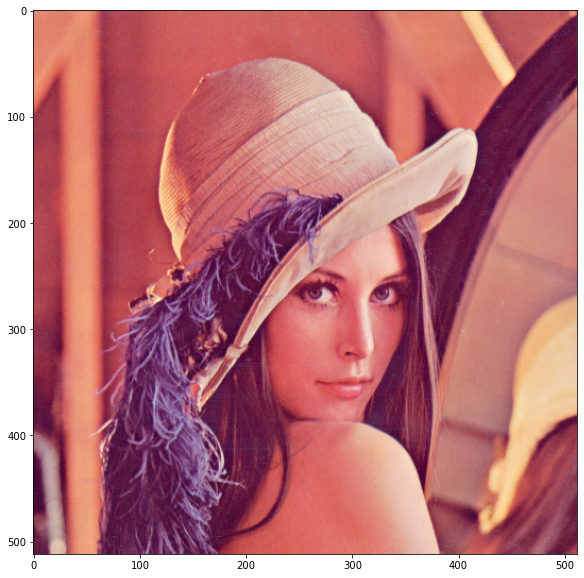

In [6]:
# cargar la imagen desde un archivo especifico
image = Image.open("lenna.png")
plt.figure(figsize=(10,10))
plt.imshow(image)
plt.show()

- Las imágenes con las que estamos trabajando se componen de valores RGB, que son valores de 0 a 255. Cero significa ruido blanco, esto hace que la imagen se vea granulada:

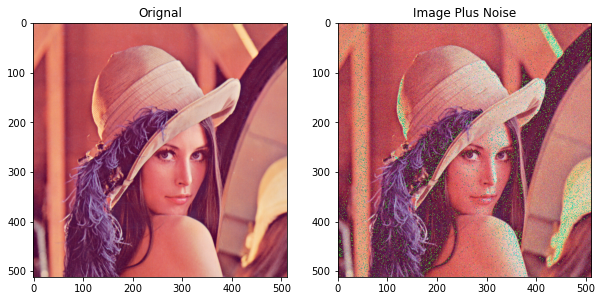

In [7]:
# Obtener el numero de filas y columnas en la imagen
rows, cols = image.size
# Crea valores usando una distribución normal con una media de 0 y una desviación estándar de 15, los valores se convierten a la unidad8, lo que significa que los valores están entre 0 y 255
noise = np.random.normal(0,15,(rows,cols,3)).astype(np.uint8)
# Agrega ruido a la imagen
noisy_image = image + noise
# Crea una imagen PIL desde un Array
noisy_image = Image.fromarray(noisy_image)
# Traza la imagen original y la imagen con ruido usando la función definida en la parte superior
plot_image(image, noisy_image, title_1="Orignal", title_2="Image Plus Noise")

- Al agregar ruido a una imagen, a veces el valor puede ser mayor que 255, en este caso 256, se resta del valor para ajustar el número manteniéndolo entre 0 y 255. Por ejemplo, considere una imagen con un valor RGB de 137 y agregamos ruido con un valor RGB de 215 para obtener un valor RGB de 352. Luego restamos 256, el número total de valores posibles entre 0 y 255, para obtener un número entre 0 y 255.

---

## Filtrado de ruido

- Para poder crear kernels de clientes y usar filtros predefinidos debemos importar la siguiente biblioteca

In [8]:
from PIL import ImageFilter

- Los filtros de suavizado promedian los píxeles dentro de un vecindario, a veces se les llama filtros de paso bajo. Para el filtrado medio, el kernel simplemente promedia los kernels en un vecindario.

In [10]:
# Cree un kernel que sea una matriz de 5 por 5 donde cada valor es 1/36
kernel = np.ones((5,5))/36

# Cree un kernel ImageFilter proporcionando el tamaño del kernel y un kernel aplanado
kernel_filter = ImageFilter.Kernel((5,5), kernel.flatten())

- La funcion `filter` realiza una convolución entre la imagen y el núcleo en cada canal de color de forma independiente.

In [11]:
# Filtra las imágenes usando el kernel
image_filtered = noisy_image.filter(kernel_filter)

- Podemos trazar la imagen antes y después del filtrado. Vemos que el ruido se reduce, pero la imagen se ve borrosa:

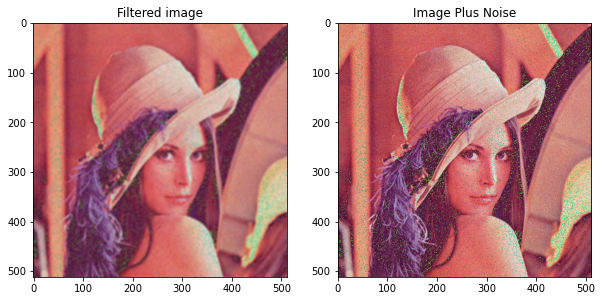

In [12]:
# Traza la imagen filtrada y con ruido usando la función definida en la parte superior
plot_image(image_filtered, noisy_image,title_1="Filtered image",title_2="Image Plus Noise")

- Un kernel más pequeño mantiene la imagen nítida, pero filtra menos ruido, aquí probamos un kernel de 3x3. Puede ver que sus hombros son más nítidos en esta imagen, pero el ruido verde es más brillante que la imagen filtrada de arriba.

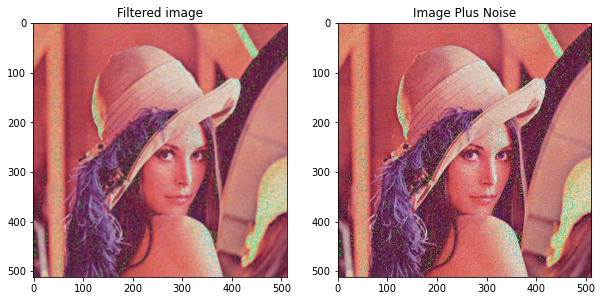

In [13]:
# Cree un kernel que sea una matriz de 3 por 3 donde cada valor es 1/36
kernel = np.ones((3,3))/36
# Cree un kernel ImageFilter proporcionando el tamaño del kernel y un kernel aplanado
kernel_filter = ImageFilter.Kernel((3,3), kernel.flatten())
## Filtra las imágenes usando el kernel
image_filtered = noisy_image.filter(kernel_filter)
# Traza la imagen filtrada y con ruido usando la función definida en la parte superior
plot_image(image_filtered, noisy_image,title_1="Filtered image",title_2="Image Plus Noise")

---

## Gaussian Blur

- Para realizar Gaussian Blur usamos la función `filter` en una imagen usando el filtro `ImageFilter.GaussianBlur`.

Parámetros

`radius`: radio de kernel de desenfoque, predeterminado 2


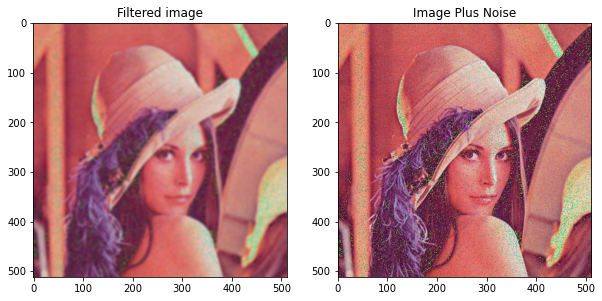

In [14]:
# Filtra las imágenes usando GaussianBlur
image_filtered = noisy_image.filter(ImageFilter.GaussianBlur)

# Traza la imagen filtrada y luego la imagen sin filtrar con ruido
plot_image(image_filtered , noisy_image,title_1="Filtered image",title_2="Image Plus Noise")

- Intentemos usando un 4 x 4 kernel

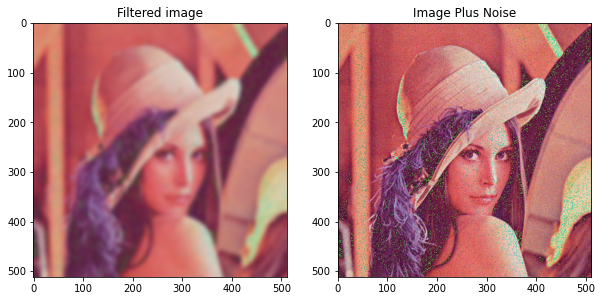

In [15]:

image_filtered = noisy_image.filter(ImageFilter.GaussianBlur(4))

plot_image(image_filtered , noisy_image,title_1="Filtered image",title_2="Image Plus Noise")

---

## Nitidez de imagen

- La nitidez de la imagen implica suavizar la imagen y calcular las derivadas. Podemos lograr la nitidez de la imagen aplicando el siguiente Kernel.

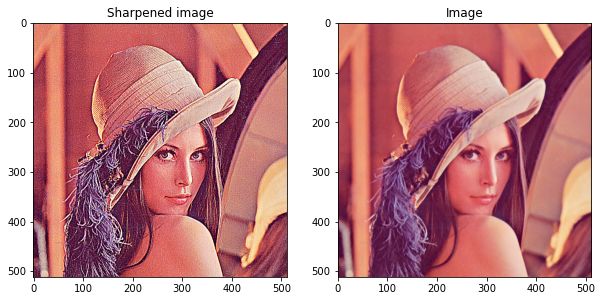

In [16]:
# kernel comun paa mejorar la nitidez de la imagen
kernel = np.array([[-1,-1,-1], 
                   [-1, 9,-1],
                   [-1,-1,-1]])
kernel = ImageFilter.Kernel((3,3), kernel.flatten())

# Aplica el filtro de nitidez usando kernel en la imagen original sin ruido
sharpened = image.filter(kernel)

# Traza la imagen nítida y la imagen original sin ruido
plot_image(sharpened , image, title_1="Sharpened image",title_2="Image")

- También podemos enfocar usando un filtro predefinido

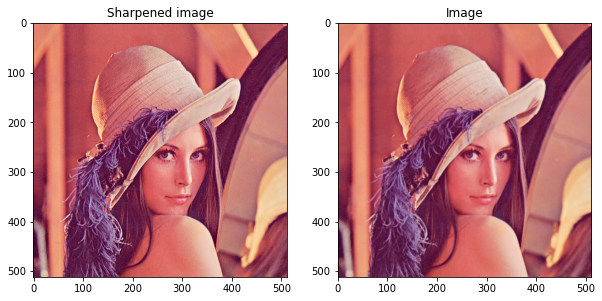

In [17]:

# Agudiza la imagen usando un filtro de imagen predefinido de PIL
sharpened = image.filter(ImageFilter.SHARPEN)

# Traza la imagen nítida y la imagen original sin ruido
plot_image(sharpened , image, title_1="Sharpened image",title_2="Image")

---

## Bordes

- Los bordes son donde cambian las intensidades de píxeles. El gradiente de una función genera la tasa de cambio; podemos aproximar el gradiente de una imagen en escala de grises con convolución. Considere la siguiente imagen:

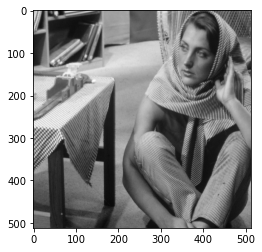

In [18]:

# Carga la imagen del archivo especificado
img_gray = Image.open('barbara.png')

# Muestra la imagen de la matriz de datos, observe cómo es 2 diemensional en lugar de 3 diemensional porque no tiene color
plt.imshow(img_gray ,cmap='gray')

- Mejoramos los bordes para que se recojan mejor cuando utilizamos la detección de bordes

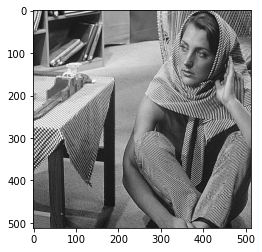

In [19]:

# Filtra las imágenes usando el filtro EDGE_ENHANCE
img_gray = img_gray.filter(ImageFilter.EDGE_ENHANCE)

# Renderiza la imagen mejorada
plt.imshow(img_gray ,cmap='gray')

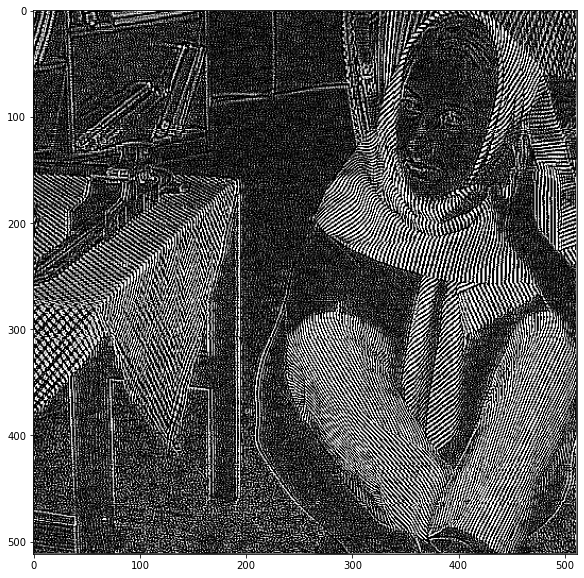

In [20]:
# Filtra las imágenes usando el filtro EDGE_ENHANCE
img_gray = img_gray.filter(ImageFilter.FIND_EDGES)

# Renderiza la imagen mejorada
plt.figure(figsize=(10,10))
plt.imshow(img_gray ,cmap='gray')

---

## Media

- Los filtros de mediana encuentran la mediana de todos los píxeles debajo del área del núcleo y el elemento central se reemplaza con este valor de mediana.

Podemos aplicar filtros de mediana a imágenes normales, pero veamos cómo podemos usar un filtro de mediana para mejorar la segmentación. Considere el ejemplo del camarógrafo:

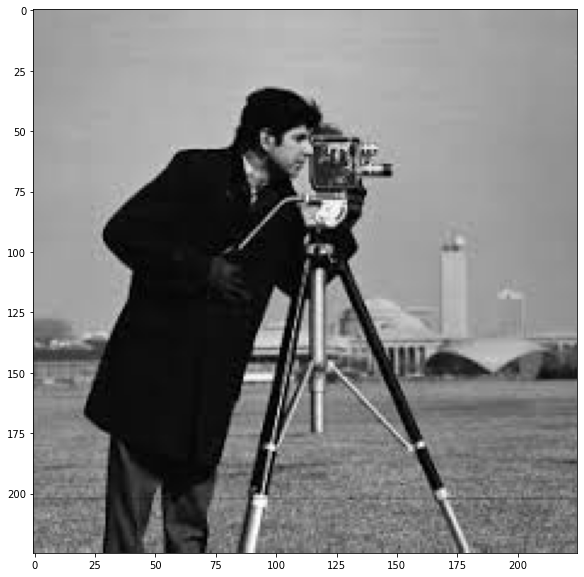

In [21]:

# Cargue la imagen del hombre de la cámara
image = Image.open("cameraman.jpeg")

# Agranda la imagen cuando se renderiza
plt.figure(figsize=(10,10))

# Renderiza la imagen
plt.imshow(image,cmap="gray")


El filtrado medio difumina el fondo, lo que aumenta la segmentación entre el camarógrafo y el fondo.

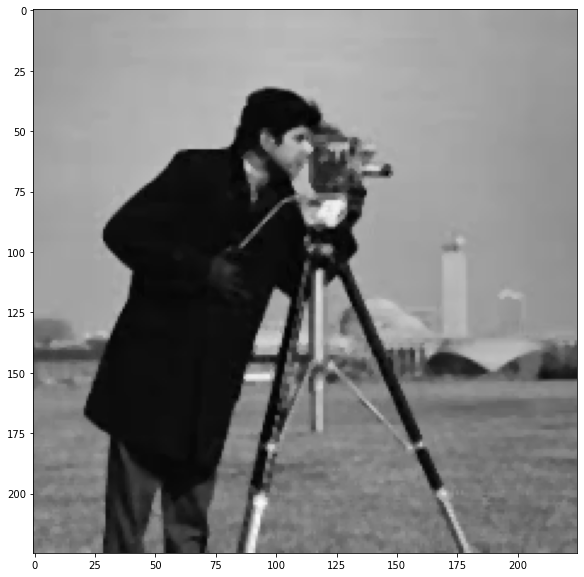

In [22]:
image = image.filter(ImageFilter.MedianFilter)
plt.figure(figsize=(10,10))
# Renders the image
plt.imshow(image,cmap="gray")